In [1]:
from detection.road import Road
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

road = Road()

In [2]:
# image = mpimg.imread("input_images/straight_lines2.jpg")
# result = road.process_image(image)
# plt.imshow(result)
# plt.show()

In [8]:
from detection.data import load_data

vehicle_imgs, non_vehicle_imgs = load_data("small")

/Users/kyledorman/Documents/carnd/vehicleDetection/data/small/vehicle.zip already downloaded.
/Users/kyledorman/Documents/carnd/vehicleDetection/data/small/non-vehicle.zip already downloaded.


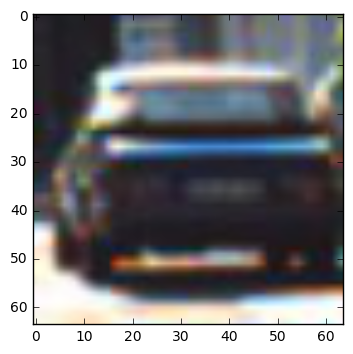

In [9]:
plt.imshow(vehicle_imgs[0])
plt.show()

base_estimator : object, optional (default=DecisionTreeClassifier)
The base estimator from which the boosted ensemble is built. Support for sample weighting is required, as well as proper classes_ and n_classes_ attributes.

n_estimators : integer, optional (default=50)
The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.

learning_rate : float, optional (default=1.)
Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

algorithm : {‘SAMME’, ‘SAMME.R’}, optional (default=’SAMME.R’)
If ‘SAMME.R’ then use the SAMME.R real boosting algorithm. base_estimator must support calculation of class probabilities. If ‘SAMME’ then use the SAMME discrete boosting algorithm. The SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations.

random_state : int, RandomState instance or None, optional (default=None)
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.